### importing our libraries 

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Reading The Data 

In [31]:
df = pd.read_csv(r"C:\Users\Lenovo\car_price_dataset.csv")

In [32]:
df.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


### Exploratory Data Analysis And Data Cleaning 

In [33]:
df.info 

<bound method DataFrame.info of            Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3    

In [34]:
print(df.dtypes)

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object


In [35]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [36]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [37]:
df.drop(['Owner_Count'],axis=1,inplace=True)

In [38]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867
...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,4084


In [39]:
df.keys()

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Price'],
      dtype='object')

In [40]:
print(df.Brand)

0              Kia
1        Chevrolet
2         Mercedes
3             Audi
4       Volkswagen
           ...    
9995           Kia
9996     Chevrolet
9997           BMW
9998          Ford
9999    Volkswagen
Name: Brand, Length: 10000, dtype: object


### Data Manipulation And Feature Engeneering 

In [41]:
df['Merged'] = df[['Brand', 'Model']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [42]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Price,Merged
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,8501,Kia Rio
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,12092,Chevrolet Malibu
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,11171,Mercedes GLA
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,11780,Audi Q5
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867,Volkswagen Golf
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,8884,Kia Optima
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,6240,Chevrolet Impala
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,9866,BMW 3 Series
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,4084,Ford Explorer


In [43]:
# Define the new order of columns
new_order = ['Merged'] + [col for col in df.columns if col != 'Combined']
# Reorder the DataFrame
df = df[new_order]

In [44]:
df

,Merged,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Price,Merged
0,Kia Rio,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,8501,Kia Rio
1,Chevrolet Malibu,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,12092,Chevrolet Malibu
2,Mercedes GLA,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,11171,Mercedes GLA
3,Audi Q5,Audi,Q5,2023,2.0,Electric,Manual,160971,2,11780,Audi Q5
4,Volkswagen Golf,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867,Volkswagen Golf
...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia Optima,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,8884,Kia Optima
9996,Chevrolet Impala,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,6240,Chevrolet Impala
9997,BMW 3 Series,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,9866,BMW 3 Series
9998,Ford Explorer,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,4084,Ford Explorer


In [45]:
df = df.rename(columns={'Merged': 'Car_name'})

In [46]:
df

,Car_name,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Price,Car_name
0,Kia Rio,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,8501,Kia Rio
1,Chevrolet Malibu,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,12092,Chevrolet Malibu
2,Mercedes GLA,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,11171,Mercedes GLA
3,Audi Q5,Audi,Q5,2023,2.0,Electric,Manual,160971,2,11780,Audi Q5
4,Volkswagen Golf,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867,Volkswagen Golf
...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia Optima,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,8884,Kia Optima
9996,Chevrolet Impala,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,6240,Chevrolet Impala
9997,BMW 3 Series,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,9866,BMW 3 Series
9998,Ford Explorer,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,4084,Ford Explorer


In [47]:
df = df.drop(columns=['Brand', 'Model'])

In [48]:
df

,Car_name,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Price,Car_name
0,Kia Rio,2020,4.2,Diesel,Manual,289944,3,8501,Kia Rio
1,Chevrolet Malibu,2012,2.0,Hybrid,Automatic,5356,2,12092,Chevrolet Malibu
2,Mercedes GLA,2020,4.2,Diesel,Automatic,231440,4,11171,Mercedes GLA
3,Audi Q5,2023,2.0,Electric,Manual,160971,2,11780,Audi Q5
4,Volkswagen Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867,Volkswagen Golf
...,...,...,...,...,...,...,...,...,...
9995,Kia Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,8884,Kia Optima
9996,Chevrolet Impala,2002,1.4,Electric,Automatic,168000,2,6240,Chevrolet Impala
9997,BMW 3 Series,2010,3.0,Petrol,Automatic,86664,5,9866,BMW 3 Series
9998,Ford Explorer,2002,1.4,Hybrid,Automatic,225772,4,4084,Ford Explorer


In [49]:
# Find duplicate columns
duplicate_cols = df.columns[df.columns.duplicated()]
print(f"Duplicate columns: {duplicate_cols.tolist()}")

# Drop duplicate columns (keeping the first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

Duplicate columns: ['Car_name']


In [50]:
df = df.T.drop_duplicates().T

In [51]:
df

,Car_name,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Price
0,Kia Rio,2020,4.2,Diesel,Manual,289944,3,8501
1,Chevrolet Malibu,2012,2.0,Hybrid,Automatic,5356,2,12092
2,Mercedes GLA,2020,4.2,Diesel,Automatic,231440,4,11171
3,Audi Q5,2023,2.0,Electric,Manual,160971,2,11780
4,Volkswagen Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867
...,...,...,...,...,...,...,...,...
9995,Kia Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,8884
9996,Chevrolet Impala,2002,1.4,Electric,Automatic,168000,2,6240
9997,BMW 3 Series,2010,3.0,Petrol,Automatic,86664,5,9866
9998,Ford Explorer,2002,1.4,Hybrid,Automatic,225772,4,4084


### Data Analysis : 

In [52]:
# First we Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
# here we will set style for better visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.1)

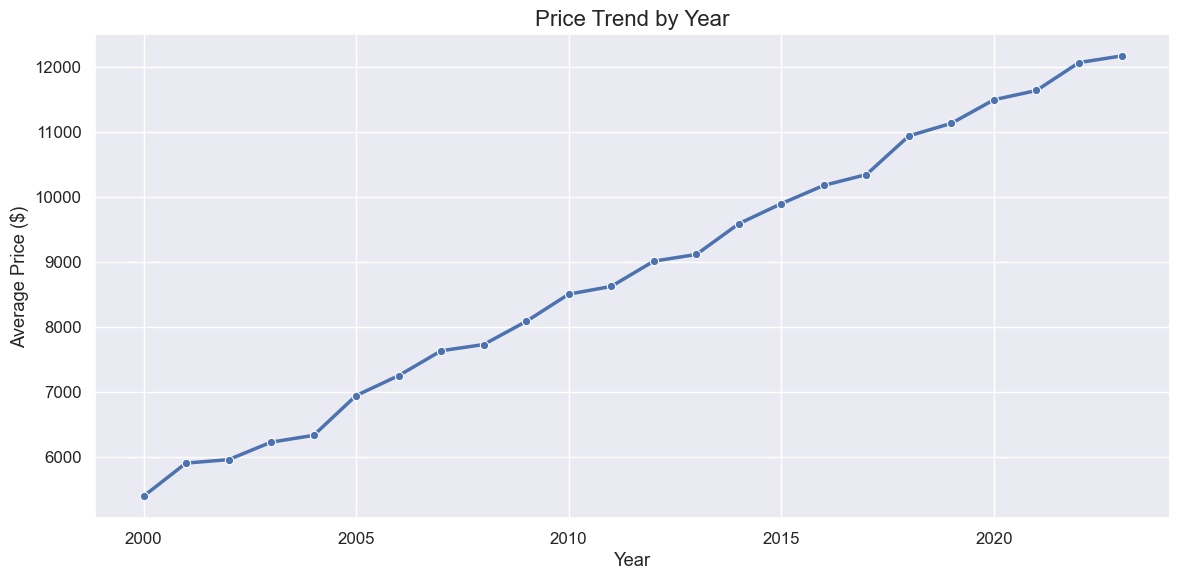

In [55]:
# Price Trend by Year
plt.figure(figsize=(12, 6))
year_avg_price = df.groupby('Year')['Price'].mean().reset_index()
sns.lineplot(x='Year', y='Price', data=year_avg_price, marker='o', linewidth=2.5)
plt.title('Price Trend by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

### Car prices show a clear upward trend from 2000 to 2023, with average prices more than doubling from ~$5,394 (2000) to ~$12,169 (2023),
### reflecting continuous value appreciation.

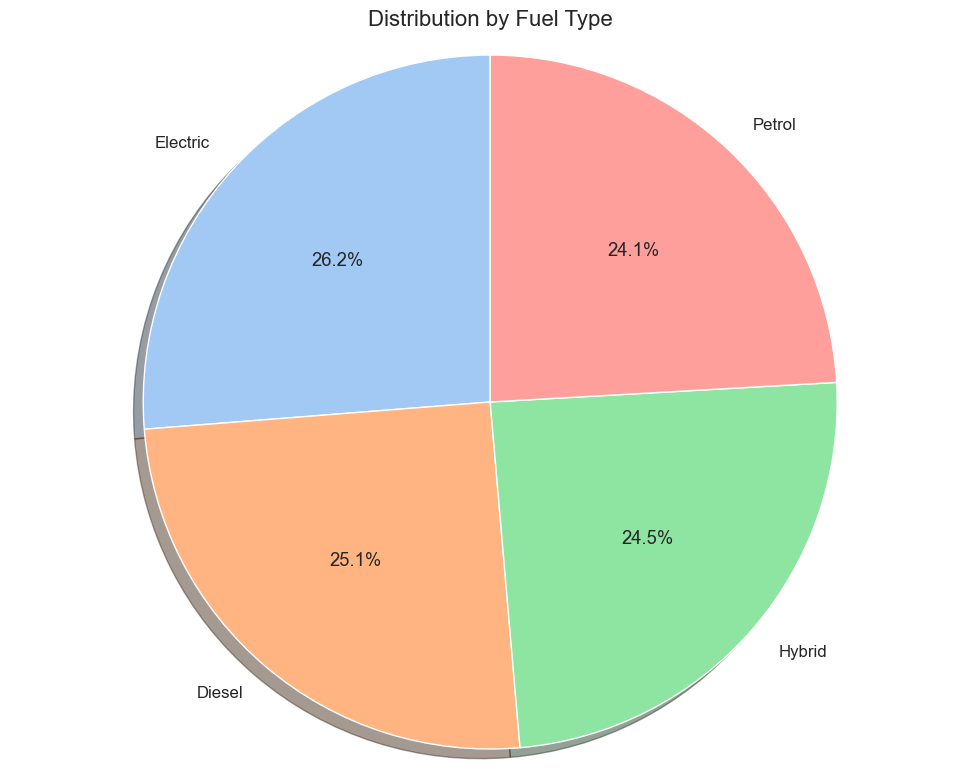

In [ ]:
# Distribution by Fuel Type
plt.figure(figsize=(10, 8))
fuel_type_counts = df['Fuel_Type'].value_counts()
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, colors=sns.color_palette('pastel'))
plt.title('Distribution by Fuel Type', fontsize=16)
plt.axis('equal') 
plt.tight_layout()
plt.show()

### The dataset has a surprisingly even distribution of fuel types with Electric (26.25%), Diesel (25.12%),
### Hybrid (24.53%), and Petrol (24.10%) all having similar representation.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7892\323513998.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_avg_price = df.groupby('Mileage_Group')['Price'].mean().reset_index()


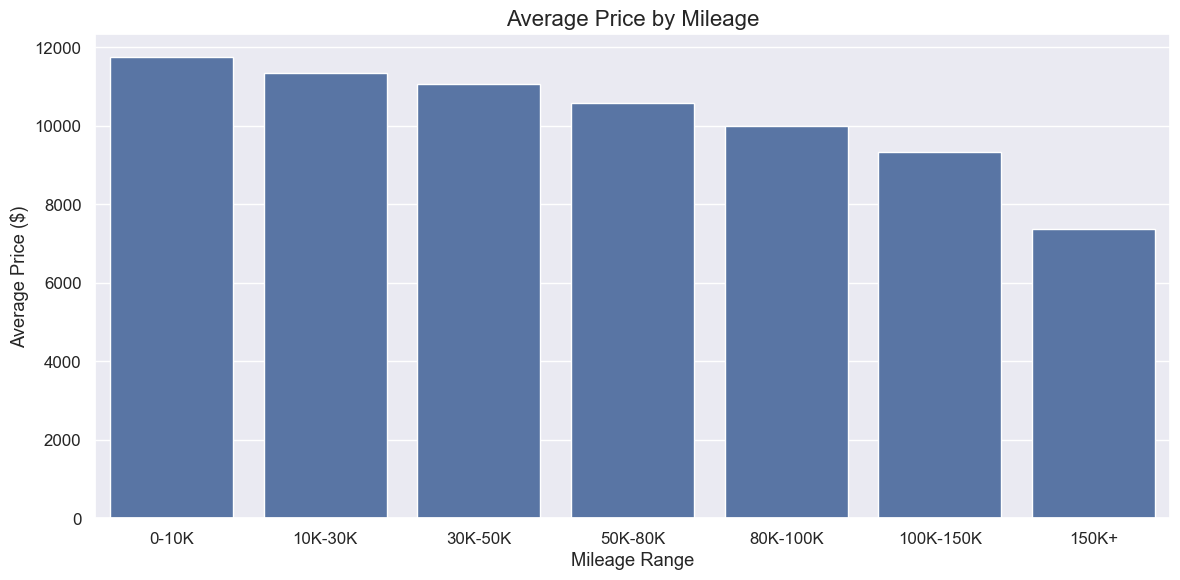

In [ ]:
# Average Price by Mileage
plt.figure(figsize=(12, 6))
# Create mileage bins
mileage_bins = [0, 10000, 30000, 50000, 80000, 100000, 150000, float('inf')]
mileage_labels = ['0-10K', '10K-30K', '30K-50K', '50K-80K', '80K-100K', '100K-150K', '150K+']
df['Mileage_Group'] = pd.cut(df['Mileage'], bins=mileage_bins, labels=mileage_labels)

# Calculate average price per mileage group
mileage_avg_price = df.groupby('Mileage_Group')['Price'].mean().reset_index()

sns.barplot(x='Mileage_Group', y='Price', data=mileage_avg_price)
plt.title('Average Price by Mileage', fontsize=16)
plt.xlabel('Mileage Range')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

### There's a strong inverse relationship between mileage and price - cars with 0-10K miles average ~$11,752,while thoes with 150K+ miles average only~$7,367,
### confirming that condition significantly impacts value.

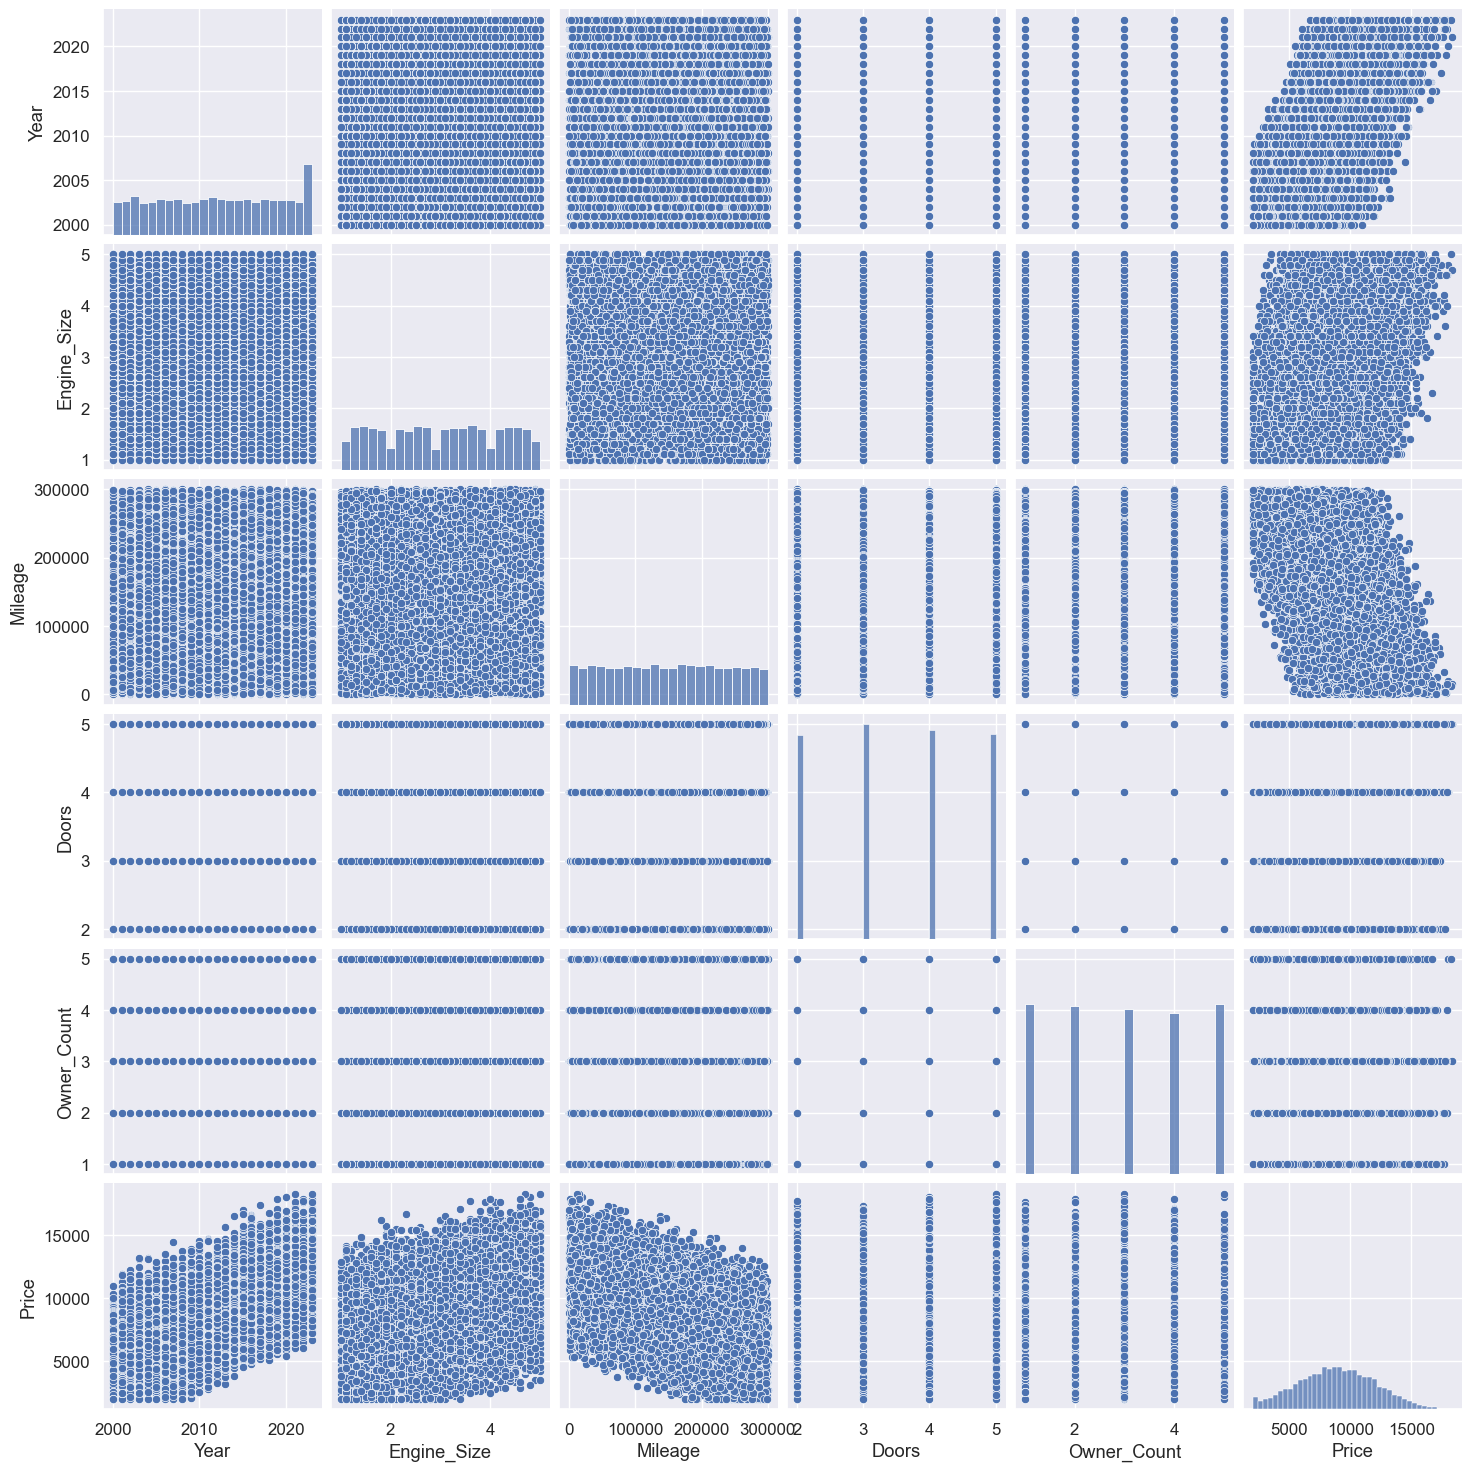

In [ ]:
import seaborn as sns 
sns.pairplot(df)

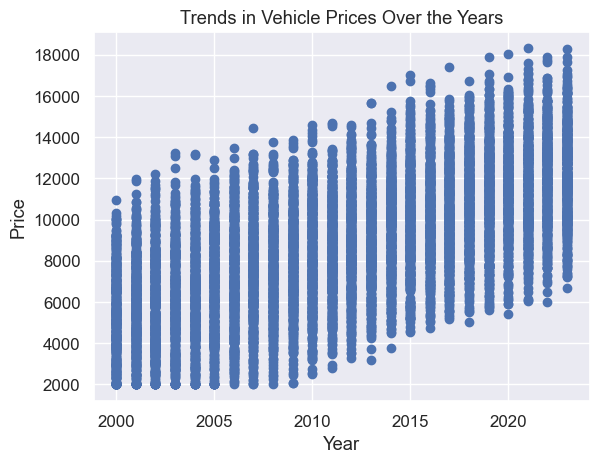

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Year'], df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Trends in Vehicle Prices Over the Years')
plt.show()


### as we see in This scatter plot illustrates vehicle price trends from 2000 to 2020,
### showing a general increase in prices over time, with a noticeable rise post-2010 . 

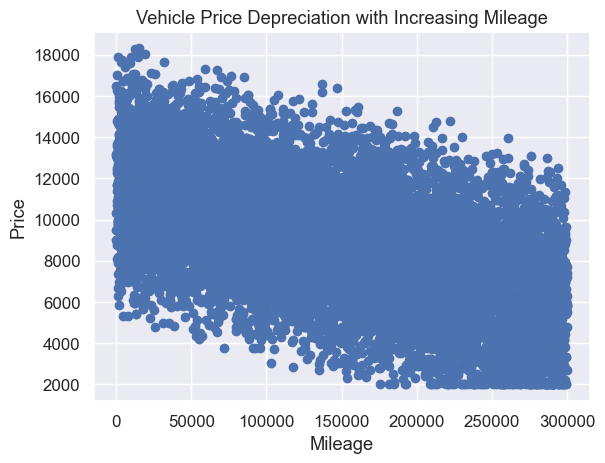

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Mileage'], df['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Vehicle Price Depreciation with Increasing Mileage')
plt.show()

### as we can see in This scatter plot illustrates the relationship between vehicle mileage and price,
### showing a general trend where higher mileage corresponds to lower prices, indicating depreciation with use.

### Building The Prediction Model 

In [ ]:
df = pd.read_csv(r"C:\Users\Lenovo\car_price_dataset.csv")

In [ ]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


### Data preprocessing

In [ ]:
# Split features and target
X = df.drop('Price', axis=1)
y = df['Price']

### Identify numerical and categorical features

In [ ]:
num_features = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']
cat_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

### Create preprocessing pipeline
## - One-hot encode categorical features
## - Scale numerical features

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

### Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build and evaluate multiple models to choose the best one

In [ ]:
#1-Linear Regression Model
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#2-Random Forest Model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [ ]:
models = {
    "Linear Regression": lr_pipeline,
    "Random Forest": rf_pipeline
}

### Function to evaluate model

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        "Training RMSE": train_rmse,
        "Testing RMSE": test_rmse,
        "Training R²": train_r2,
        "Testing R²": test_r2
    }

### Evaluate each model

In [ ]:
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    for metric, value in results[name].items():
        print(f"{metric}: {value:.2f}")


Evaluating Linear Regression...
Training RMSE: 90.11
Testing RMSE: 64.91
Training R²: 1.00
Testing R²: 1.00

Evaluating Random Forest...
Training RMSE: 128.74
Testing RMSE: 334.92
Training R²: 1.00
Testing R²: 0.99


### Select the best model :

In [ ]:
best_model = rf_pipeline

### Feature importance (for Random Forest)

In [ ]:
best_model.fit(X_train, y_train)
feature_importances = best_model.named_steps['regressor'].feature_importances_

In [ ]:
### Get feature names after preprocessing

In [ ]:
ohe = best_model.named_steps['preprocessor'].transformers_[1][1]
cat_feature_names = ohe.get_feature_names_out(cat_features)
feature_names = np.concatenate([num_features, cat_feature_names])

### Create a DataFrame for feature importances

In [ ]:
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importances = importances.sort_values('Importance', ascending=False)

### Printing top 10 most important features

In [ ]:
print("\nTop 10 most important features:")
print(importances.head(10))


Top 10 most important features:
                   Feature  Importance
0                     Year    0.438197
2                  Mileage    0.310576
1              Engine_Size    0.135455
46      Fuel_Type_Electric    0.049205
49  Transmission_Automatic    0.046028
47        Fuel_Type_Hybrid    0.009214
4              Owner_Count    0.001452
3                    Doors    0.001251
45        Fuel_Type_Diesel    0.001012
48        Fuel_Type_Petrol    0.000996


### Saving the model for future use :

In [ ]:
import joblib
joblib.dump(best_model, 'car_price_prediction_model.pkl')

['car_price_prediction_model.pkl']

### Function to make predictions for new cars

In [ ]:
def predict_car_price(model, car_details):
    """
    Predict car price based on input features.
    
    Parameters:
    model: Trained model
    car_details: Dictionary containing car features
    
    Returns:
    Predicted price
    """
    # Convert input to DataFrame
    car_df = pd.DataFrame([car_details])
    
    # Make prediction
    predicted_price = model.predict(car_df)[0]
    
    return predicted_price


### Prediction Example 

In [ ]:
example_car = {
    'Brand': 'Toyota',
    'Model': 'Camry',
    'Year': 2018,
    'Engine_Size': 2.5,
    'Fuel_Type': 'Petrol',
    'Transmission': 'Automatic',
    'Mileage': 50000,
    'Doors': 4,
    'Owner_Count': 1
}

# Predict price for example car
print("\nExample prediction:")
print(f"Car details: {example_car}")
print(f"Predicted price: ${predict_car_price(best_model, example_car):.2f}")


Example prediction:
Car details: {'Brand': 'Toyota', 'Model': 'Camry', 'Year': 2018, 'Engine_Size': 2.5, 'Fuel_Type': 'Petrol', 'Transmission': 'Automatic', 'Mileage': 50000, 'Doors': 4, 'Owner_Count': 1}
Predicted price: $12772.06


### Visualize actual vs predicted prices for test data :

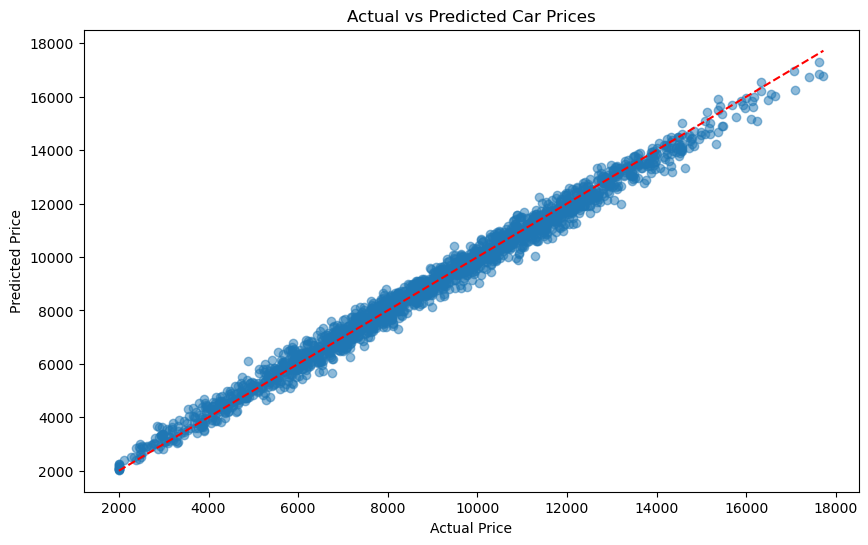

In [ ]:
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

### as we see in This scatter plot  it compares actual car prices to predicted prices, 
### showing a strong linear relationship with points closely aligned along the diagonal, indicating accurate predictions.

### Visualize residuals (error analysis) : 

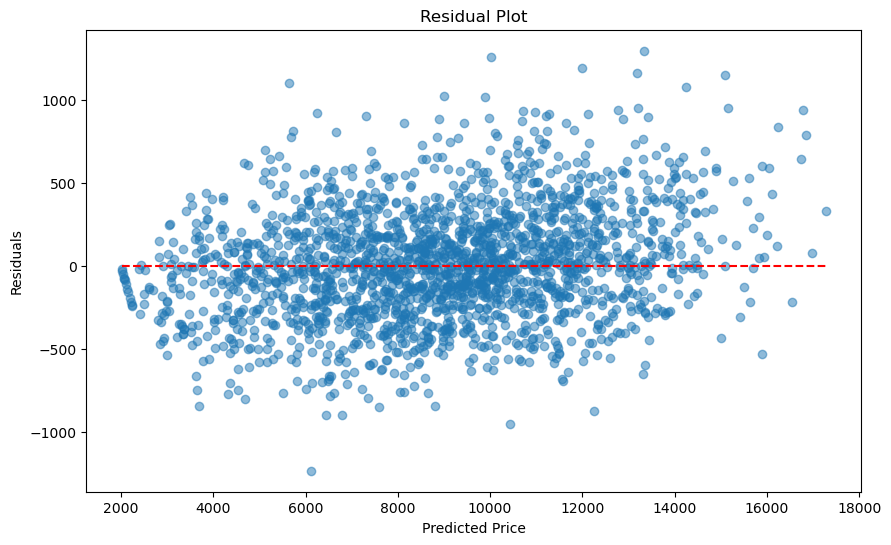

In [ ]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### as we can see in this This residual plot  it displays the differences between observed and predicted prices,
### showing a random scatter around zero, which suggests a good fit for the model without systematic bias.

In [ ]:
print("\n The Model training and Visualisation is Done !")


 Model training and evaluation complete!
